In [1]:
import os
import pandas as pd
import numpy as np
import pathlib
import xarray as xr
import rioxarray

In [2]:
read_file_path: str = r"./../data_global_surge/nmefc_surge_latlon0p05_IndiaOcean.nc"
"""读取文件"""

'读取文件'

In [3]:
data = xr.open_dataset(read_file_path)
data

<xarray.Dataset>
Dimensions:    (Time: 193, latitude: 1361, longitude: 1601)
Coordinates:
  * longitude  (longitude) float64 20.0 20.05 20.1 20.15 ... 99.9 99.95 100.0
  * latitude   (latitude) float64 -36.0 -35.95 -35.9 -35.85 ... 31.9 31.95 32.0
  * Time       (Time) datetime64[ns] 2023-10-31T12:00:00 ... 2023-11-08T12:00:00
Data variables:
    maskLand   (latitude, longitude) float64 ...
    h          (Time, latitude, longitude) float32 ...
    hMax       (latitude, longitude) float32 ...

In [13]:
data_standard=data.sortby('latitude',ascending=False)
data_standard

<xarray.Dataset>
Dimensions:    (Time: 193, latitude: 1361, longitude: 1601)
Coordinates:
  * longitude  (longitude) float64 20.0 20.05 20.1 20.15 ... 99.9 99.95 100.0
  * latitude   (latitude) float64 32.0 31.95 31.9 31.85 ... -35.9 -35.95 -36.0
  * Time       (Time) datetime64[ns] 2023-10-31T12:00:00 ... 2023-11-08T12:00:00
Data variables:
    maskLand   (latitude, longitude) float64 ...
    h          (Time, latitude, longitude) float32 ...
    hMax       (latitude, longitude) float32 ...

In [9]:
len(data.coords["Time"])

193

In [14]:
first_time = data_standard["Time"].values[0]
first_time

numpy.datetime64('2023-10-31T12:00:00.000000000')

In [15]:
first_dr = data_standard.sel(Time=first_time)["h"]
first_dr

<xarray.DataArray 'h' (latitude: 1361, longitude: 1601)>
[2178961 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float64 20.0 20.05 20.1 20.15 ... 99.9 99.95 100.0
  * latitude   (latitude) float64 32.0 31.95 31.9 31.85 ... -35.9 -35.95 -36.0
    Time       datetime64[ns] 2023-10-31T12:00:00
Attributes:
    units:      m
    long_name:  Storm surge elevation

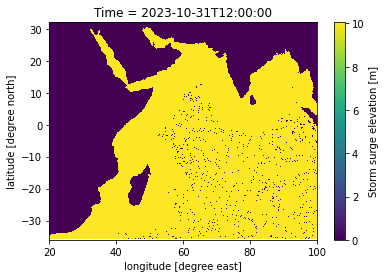

In [16]:
first_dr.plot()

In [17]:
# 设置空间坐标系与分辨率
first_dr.rio.set_spatial_dims(x_dim="longitude", y_dim="latitude", inplace=True)
first_dr.rio.write_crs("EPSG:4326", inplace=True)

<xarray.DataArray 'h' (latitude: 1361, longitude: 1601)>
[2178961 values with dtype=float32]
Coordinates:
  * longitude    (longitude) float64 20.0 20.05 20.1 20.15 ... 99.9 99.95 100.0
  * latitude     (latitude) float64 32.0 31.95 31.9 31.85 ... -35.9 -35.95 -36.0
    Time         datetime64[ns] 2023-10-31T12:00:00
    spatial_ref  int32 0
Attributes:
    units:         m
    long_name:     Storm surge elevation
    grid_mapping:  spatial_ref

In [94]:
out_put_file_path: str = (
    r"./../data_global_surge/nmefc_surge_latlon0p05_IndiaOcean_001_lzw.tif"
)

In [95]:
first_dr.rio.to_raster(out_put_file_path)

In [96]:
OUT_PUT_PATH: str = r"D:\01Proj\GlobalSurgeSys\background\byjupyter\data_global_surge"
import pathlib

In [135]:
# 定义实体类
from typing import List, Union, Optional
from pydantic import BaseModel, Field
from datetime import datetime
from sqlalchemy.orm import Mapped
from sqlalchemy.orm import mapped_column, DeclarativeBase
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import String,Integer,ForeignKey,PrimaryKeyConstraint
from arrow import Arrow
import arrow

In [148]:
BaseMeta = declarative_base()


class GeoNetcdfFiles(BaseMeta):
    """
    栅格 file 基础信息
    """

    id: Mapped[str] = mapped_column(Integer, primary_key=True, autoincrement=True)
    gmt_modify_time: Mapped[datetime] = mapped_column(default=datetime.utcnow)
    gmt_create_time: Mapped[datetime] = mapped_column(default=datetime.utcnow)
    release_time: Mapped[datetime] = mapped_column(default=datetime.utcnow)
    release_ts: Mapped[int] = mapped_column(default=Arrow.utcnow().int_timestamp)
    time_dims_len: Mapped[int] = mapped_column(nullable=False, default=0)
    relative_path: Mapped[str] = mapped_column(String(50), default="")
    file_name: Mapped[str] = mapped_column(String(50), default="")
    area: Mapped[int] = mapped_column(nullable=False, default=0)
    product_type: Mapped[int] = mapped_column(nullable=False, default=0)
    __tablename__ = "geo_netcdf_files"

    class Config:
        orm_mode = True


class GeoTiffFiles(BaseMeta):
    id: Mapped[str] = mapped_column(Integer, primary_key=True, autoincrement=True)
    file_name: Mapped[str] = mapped_column(String(50), default="")
    relative_path: Mapped[str] = mapped_column(String(50), default="")

    gmt_modify_time: Mapped[datetime] = mapped_column(default=datetime.utcnow)
    gmt_create_time: Mapped[datetime] = mapped_column(default=datetime.utcnow)

    release_time: Mapped[datetime] = mapped_column(default=datetime.utcnow)
    release_ts: Mapped[int] = mapped_column(default=Arrow.utcnow().int_timestamp)

    time_dims_len: Mapped[int] = mapped_column(nullable=False, default=0)

    area: Mapped[int] = mapped_column(nullable=False, default=0)
    product_type: Mapped[int] = mapped_column(nullable=False, default=0)

    forecast_time: Mapped[datetime] = mapped_column(default=datetime.utcnow)
    forecast_ts: Mapped[int] = mapped_column(default=Arrow.utcnow().int_timestamp)

    nc_file_id: Mapped[int] = mapped_column(nullable=False, default=0)
    __tablename__ = "geo_tif_files"

    class Config:
        orm_mode = True

c:\Users\evase\anaconda3\envs\newoilgdal\lib\site-packages\ipykernel_launcher.py:1: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  """Entry point for launching an IPython kernel.


In [ ]:
# 关联表
class RelaNCTiff(BaseMeta):
    
    
    # id: Mapped[str] = mapped_column(
    #     Integer, primary_key=True, default=-1, autoincrement=True
    # )
    nc_file_id: Mapped[str] = mapped_column(Integer, ForeignKey("geo_netcdf_files.id"))
    tif_file_id: Mapped[str] = mapped_column(Integer, ForeignKey("geo_tif_files.id"))
    PrimaryKeyConstraint("nc_file_id", "tif_file_id", name="rela_nc_tif_pk")

    __tablename__ = "rela_nc_tif"
    
    # __table_args__ = (
    #     PrimaryKeyConstraint(),
    #     {},
    # )
    
    __table_args__ = {'extend_existing': True}

    class Config:
        orm_mode = True
        # extend_existing = True

In [152]:
SURGE_NAME_BASE: str = "nmefc_surge_latlon0p05_IndiaOcean_"


def nc2tiff(
    read_file_path: str, out_put_path: str, session, out_put_dim_name: str = "h"
):
    """
    将nc文件按照time维度进行切片,存储至 out_put_path
    """
    df: pd.DataFrame = xr.open_dataset(read_file_path)
    # 根据df的time维度获取维度长度
    dims_time_name: str = "Time"
    # 获取time维度长度
    times = df.coords[dims_time_name]
    time_count: int = len(times)
    # 获取起始时间
    start_dt64: np.datetime64 = times[0].values
    """起始时间"""
    start_ts: int = int(pd.Timestamp(start_dt64).timestamp())
    """起始时间戳"""
    start_dt: datetime = arrow.get(start_ts).datetime
    file_name: str = "nmefc_surge_latlon0p05_IndiaOcean.nc"
    relate_path: str = r"/"
    nc_model = GeoNetcdfFiles(
        release_time=start_dt,
        release_ts=start_ts,
        time_dims_len=time_count,
        file_name=file_name,
        area=0,
        product_type=1,
    )
    session.add(nc_model)

    for index, time in enumerate(times):
        index_str: str = str(index)
        standard_index_str: str = index_str.zfill(3)
        out_put_file_name: str = f"{SURGE_NAME_BASE}{standard_index_str}.tif"
        # print(index)
        current_dt64: np.datetime64 = time.values
        current_ts: int = int(pd.Timestamp(current_dt64).timestamp())
        current_dt = arrow.get(current_ts).datetime
        print(f"当前时间{current_ts}")
        # 进行每个时刻的 h 的读取及处理
        temp_df = df.sel(Time=time)[out_put_dim_name]
        temp_df.rio.set_spatial_dims(x_dim="longitude", y_dim="latitude", inplace=True)
        temp_df.rio.write_crs("EPSG:4326", inplace=True)
        # 输出tiff
        temp_out_put_path: str = str(pathlib.Path(OUT_PUT_PATH) / out_put_file_name)
        # print(f'当前路径:{temp_out_put_path}')
        temp_df.rio.to_raster(temp_out_put_path)
        # print(f"[-]输出:{out_put_file_name}成功!")
        temp_tif_model = GeoTiffFiles(
            release_time=start_dt,
            release_ts=start_ts,
            time_dims_len=time_count,
            file_name=file_name,
            area=0,
            product_type=1,
            forecast_time=current_dt,
            forecast_ts=current_ts,
            relative_path=relate_path,
        )
        session.add(temp_tif_model)


# nc2tiff(read_file_path,OUT_PUT_PATH)

In [102]:
from contextlib import contextmanager

from sqlalchemy import create_engine, Engine
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import sessionmaker, scoped_session, Session

In [104]:
DATABASES = {
    'default': {
        # mac 尝试使用
        'ENGINE': 'mysqldb',  # 数据库引擎
        # 'ENGINE': 'mysqldb',  # 数据库引擎
        'NAME': 'surge_global_sys',  # 数据库名
        'USER': 'root',  # 账号
        'PASSWORD': '',
        # 'HOST': 'localhost',  # HOST
        'HOST': '128.5.9.79',  # HOST
        # 'HOST': '192.168.0.115',  # nw-测试地址
        # 'HOST': '172.17.0.1',  # 9.79 docker 内部访问 mysql 地址
        # 'HOST': 'host.docker.internal',  # docker 宿主机
        'POST': 3306,  # 端口
        'OPTIONS': {
            "init_command": "SET foreign_key_checks = 0;",
        },
    },

}

In [105]:
class DBConfig:
    """
    DbConfig DB配置类
    :version: 1.4
    :date: 2020-02-11
    """

    driver = "mysql+mysqldb"
    # host = '127.0.0.1'
    # 宿主机的mysql服务
    # host = 'host.docker.internal'
    # 线上环境由于 server 解释器为 docker，通过ifconfig 查看 docker0 的网络地址，通过该地址访问
    # host = '172.17.0.1'
    host = "128.5.9.79"
    port = "3306"
    username = "root"
    password = ""
    database = "surge_global_sys"
    charset = "utf8mb4"
    table_name_prefix = ""
    echo = False
    pool_size = 10  # 整数，连接池的大小，默认是 5。表示连接池中保持的连接数量。
    max_overflow = 20  # 整数，超过 pool_size 后可以额外创建的连接数。默认是 10。
    pool_timeout = 30  # 整数或浮点数，获取连接时的超时时间（秒），默认是 30 秒。
    pool_recycle = 180  # 整数，连接池中连接的回收时间（秒）。超过这个时间的连接会被自动断开并替换。默认是 -1，表示不使用回收。

    def get_url(self):
        config = [
            self.driver,
            "://",
            self.username,
            ":",
            self.password,
            "@",
            self.host,
            ":",
            self.port,
            "/",
            self.database,
            "?charset=",
            self.charset,
        ]

        return "".join(config)

In [106]:
class DbFactory:
    """
        数据库工厂
        24-08-28 目前使用的 数据库工厂类
    """

    default_config: DBConfig = DBConfig()
    """默认配置项"""

    def __init__(self, db_mapping: str = 'default', engine_str: str = None, host: str = None, port: str = None,
                 db_name: str = None,
                 user: str = None,
                 pwd: str = None):
        """
            mysql 数据库 构造函数
        :param db_mapping:
        :param engine_str:
        :param host:
        :param port:
        :param db_name:
        :param user:
        :param pwd:
        """
        db_options = DATABASES.get(db_mapping)
        config = self.default_config
        '''当前加载的默认配置'''
        self.engine_str = engine_str if engine_str else db_options.get('ENGINE')
        self.host = host if host else db_options.get('HOST')
        self.port = port if port else db_options.get('POST')
        self.db_name = db_name if db_name else db_options.get('NAME')
        self.user = user if user else db_options.get('USER')
        self.password = pwd if pwd else db_options.get('PASSWORD')
        # TypeError: Invalid argument(s) 'encoding' sent to create_engine(), using configuration MySQLDialect_mysqldb/QueuePool/Engine.  Please check that the keyword arguments are appropriate for this combination of components.
        self.engine = create_engine(
            f"mysql+{self.engine_str}://{self.user}:{self.password}@{self.host}:{self.port}/{self.db_name}",
            pool_pre_ping=True, future=True, echo=False, pool_size=config.pool_size,
            max_overflow=config.max_overflow,
            pool_recycle=config.pool_recycle, )
        # TODO:[-] 23-03-03 通过 scoped_session 来提供现成安全的全局session
        # 参考: https://juejin.cn/post/6844904164141580302
        self._session_def = scoped_session(sessionmaker(bind=self.engine))
        """cls中的默认 session """

    @property
    def Session(self) -> scoped_session:
        """
            获取 cls._session_def -> session
        @return:
        """
        if self._session_def is None:
            self._session_def = scoped_session(sessionmaker(bind=self.engine))
        return self._session_def()


In [124]:
df: pd.DataFrame = xr.open_dataset(read_file_path)
# times = df.coords["Time"]
# times.isel(Time=0)
df['Time'][0]

<xarray.DataArray 'Time' ()>
array('2023-10-31T12:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    Time     datetime64[ns] 2023-10-31T12:00:00

In [128]:
df['Time'][0].values

numpy.datetime64('2023-10-31T12:00:00.000000000')

In [131]:
int(pd.Timestamp(df['Time'][0].values).timestamp())

1698753600

In [132]:
import arrow

In [134]:
arrow.get(int(pd.Timestamp(df['Time'][0].values).timestamp()))

<Arrow [2023-10-31T12:00:00+00:00]>

-----

In [153]:
with DbFactory().Session as session:
    nc2tiff(read_file_path, OUT_PUT_PATH, session)
    session.commit()

当前时间1698753600
当前时间1698757200
当前时间1698760800
当前时间1698764400
当前时间1698768000
当前时间1698771600
当前时间1698775200
当前时间1698778800
当前时间1698782400
当前时间1698786000
当前时间1698789600
当前时间1698793200
当前时间1698796800
当前时间1698800400
当前时间1698804000
当前时间1698807600
当前时间1698811200
当前时间1698814800
当前时间1698818400
当前时间1698822000
当前时间1698825600
当前时间1698829200
当前时间1698832800
当前时间1698836400
当前时间1698840000
当前时间1698843600
当前时间1698847200
当前时间1698850800
当前时间1698854400
当前时间1698858000
当前时间1698861600
当前时间1698865200
当前时间1698868800
当前时间1698872400
当前时间1698876000
当前时间1698879600
当前时间1698883200
当前时间1698886800
当前时间1698890400
当前时间1698894000
当前时间1698897600
当前时间1698901200
当前时间1698904800
当前时间1698908400
当前时间1698912000
当前时间1698915600
当前时间1698919200
当前时间1698922800
当前时间1698926400
当前时间1698930000
当前时间1698933600
当前时间1698937200
当前时间1698940800
当前时间1698944400
当前时间1698948000
当前时间1698951600
当前时间1698955200
当前时间1698958800
当前时间1698962400
当前时间1698966000
当前时间1698969600
当前时间1698973200
当前时间1698976800
当前时间1698980400
当前时间1698984000
当前时间1698987600
当前时间169899